In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

EDA.ipynb


In [10]:
train_df = pd.read_csv("../../data/train_data.csv", index_col='id')
test_df = pd.read_csv("../../data/test_data.csv", index_col='id')
all_df = pd.concat([train_df, test_df])

train_size = train_df.shape[0]
test_size = test_df.shape[0]
all_size = train_size + test_size

print("train data size : ", train_size)
print("test data size : ", test_size)
print("the ratio of train and test  ", train_size/all_size, " : ", test_size/all_size )
train_df.head()

train data size :  66125
test data size :  28340
the ratio of train and test   0.6999947070343513  :  0.30000529296564865


,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,...,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y
id,,,,,,,,,,,,,,,,,,,,,
1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,...,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0,1
2,2019-12-14T04:00:00+00:00,5.0.1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,jetsweeper,...,squiclean_b,NaN,118.0,campingshelter,NaN,168.0,sputtery_clear,NaN,151.0,0
3,2019-12-25T14:00:00+00:00,5.0.1,gachi,standard,hoko,ama,nzap89,a-,114,quadhopper_black,...,nzap85,a+,163.0,prime_becchu,a-,160.0,dualsweeper_custom,a,126.0,0
4,2019-11-11T14:00:00+00:00,5.0.1,regular,standard,nawabari,engawa,bamboo14mk1,NaN,336,splatroller_becchu,...,liter4k,NaN,189.0,promodeler_mg,NaN,194.0,hotblaster_custom,NaN,391.0,0
5,2019-12-14T06:00:00+00:00,5.0.1,gachi,standard,hoko,chozame,bold_7,x,299,hissen_hue,...,sputtery_hue,x,45.0,bucketslosher_soda,x,246.0,wakaba,x,160.0,1


## カラムの確認

In [4]:
print(train_df.columns)

Index(['period', 'game-ver', 'lobby-mode', 'lobby', 'mode', 'stage',
       'A1-weapon', 'A1-rank', 'A1-level', 'A2-weapon', 'A2-rank', 'A2-level',
       'A3-weapon', 'A3-rank', 'A3-level', 'A4-weapon', 'A4-rank', 'A4-level',
       'B1-weapon', 'B1-rank', 'B1-level', 'B2-weapon', 'B2-rank', 'B2-level',
       'B3-weapon', 'B3-rank', 'B3-level', 'B4-weapon', 'B4-rank', 'B4-level',
       'y'],
      dtype='object')


In [6]:
train_df["period"] = pd.to_datetime(train_df['period'])
test_df["period"] = pd.to_datetime(test_df['period'])

print(train_df["period"].max() == test_df["period"].max())
print(train_df["period"].min() == test_df["period"].min())
print(train_df["period"].max())
print(train_df["period"].min())

True
True


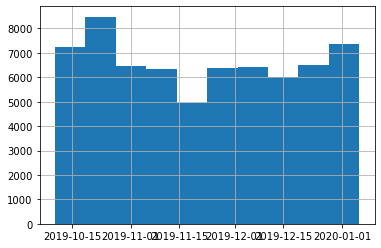

In [7]:
train_df["period"].hist()

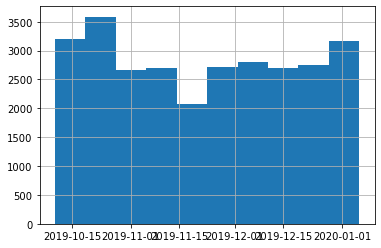

In [8]:
test_df["period"].hist()

In [17]:
print(all_df["lobby-mode"].value_counts())
print(all_df["lobby"].value_counts())

gachi      73749
regular    20716
Name: lobby-mode, dtype: int64

In [19]:
all_df["mode"].value_counts()

area        21123
nawabari    20716
hoko        19476
yagura      18523
asari       14627
Name: mode, dtype: int64

In [20]:
all_df["stage"].value_counts()

ama          5311
chozame      5027
zatou        4904
mutsugoro    4742
shottsuru    4594
kombu        4588
gangaze      4547
sumeshi      4429
manta        4397
devon        4158
battera      4096
bbass        4025
mozuku       4017
arowana      3985
anchovy      3930
hakofugu     3775
hokke        3730
engawa       3638
ajifry       3570
tachiuo      3477
fujitsubo    3414
mongara      3079
otoro        3032
Name: stage, dtype: int64

In [46]:
weapon_list = ["A2-weapon", "A3-weapon", "A4-weapon", "B1-weapon", "B2-weapon", "B3-weapon", "B4-weapon"]
all_df[ all_df["mode"]== "area" ][weapon_list].apply(pd.value_counts).sum(axis=1).sort_values().to_dict()

{'bottlegeyser': 18.0,
 'screwslosher': 37.0,
 'heroslosher_replica': 56.0,
 'rapid_deco': 65.0,
 'nova_neo': 70.0,
 'longblaster_custom': 73.0,
 '52gal_deco': 74.0,
 'soytuber_custom': 79.0,
 'dynamo': 90.0,
 'clashblaster': 96.0,
 'rapid_elite_deco': 99.0,
 'heroblaster_replica': 103.0,
 'herospinner_replica': 107.0,
 'h3reelgun': 113.0,
 'soytuber': 115.0,
 'bamboo14mk2': 118.0,
 'h3reelgun_cherry': 138.0,
 'liter4k_scope_custom': 162.0,
 'campingshelter_sorella': 163.0,
 'quadhopper_white': 170.0,
 'spygadget_sorella': 170.0,
 'pablo_permanent': 173.0,
 'barrelspinner': 183.0,
 'l3reelgun_becchu': 193.0,
 'screwslosher_neo': 195.0,
 'herobrush_replica': 199.0,
 'rapid_elite': 200.0,
 'heroshelter_replica': 202.0,
 'bamboo14mk3': 203.0,
 'kelvin525': 210.0,
 'bucketslosher': 211.0,
 '52gal': 213.0,
 'splatspinner_collabo': 215.0,
 'splatspinner_becchu': 215.0,
 'liter4k_custom': 217.0,
 'parashelter': 225.0,
 'variableroller': 235.0,
 'rapid': 276.0,
 'spygadget_becchu': 295.0,
 'sq

In [47]:
all_df[ all_df["mode"]== "hoko" ][weapon_list].apply(pd.value_counts).sum(axis=1).sort_values().to_dict()

{'bottlegeyser': 61,
 'rapid_elite_deco': 71,
 'campingshelter_sorella': 75,
 'heroslosher_replica': 79,
 'longblaster_custom': 79,
 'nova_neo': 80,
 'soytuber_custom': 83,
 'spygadget_sorella': 96,
 'rapid_deco': 97,
 'bamboo14mk2': 100,
 'h3reelgun': 110,
 'heroblaster_replica': 110,
 'h3reelgun_cherry': 114,
 'spygadget_becchu': 117,
 'pablo_permanent': 117,
 'screwslosher_neo': 120,
 'liter4k_scope_custom': 122,
 'heroshelter_replica': 125,
 'screwslosher': 133,
 'splatspinner_collabo': 134,
 'rapid': 142,
 'liter4k_custom': 142,
 'bamboo14mk3': 145,
 'spygadget': 148,
 'quadhopper_white': 148,
 'promodeler_rg': 150,
 'variableroller': 161,
 'rapid_elite': 165,
 'soytuber': 175,
 'splatspinner_becchu': 189,
 'herobrush_replica': 193,
 'l3reelgun_becchu': 209,
 '52gal_deco': 211,
 'parashelter': 218,
 '52gal': 224,
 'barrelspinner_deco': 230,
 'dynamo': 236,
 'kelvin525': 240,
 'bucketslosher': 249,
 'splatscope_collabo': 257,
 'kelvin525_becchu': 262,
 'campingshelter': 268,
 'expl

In [48]:
all_df[ all_df["mode"]== "yagura" ][weapon_list].apply(pd.value_counts).sum(axis=1).sort_values().to_dict()

{'campingshelter_sorella': 39.0,
 'bamboo14mk2': 67.0,
 'bottlegeyser': 68.0,
 'splatspinner_collabo': 77.0,
 'soytuber_custom': 79.0,
 'heroslosher_replica': 91.0,
 'quadhopper_white': 93.0,
 'h3reelgun_cherry': 94.0,
 'l3reelgun_becchu': 97.0,
 'longblaster_custom': 99.0,
 'spygadget_sorella': 105.0,
 'promodeler_rg': 108.0,
 'splatspinner_becchu': 109.0,
 'h3reelgun': 113.0,
 'bamboo14mk3': 121.0,
 '52gal_deco': 130.0,
 'liter4k_custom': 131.0,
 'variableroller': 136.0,
 'pablo_permanent': 137.0,
 'liter4k_scope_custom': 148.0,
 'screwslosher_neo': 150.0,
 'nova_neo': 151.0,
 'campingshelter': 152.0,
 'rapid_elite_deco': 155.0,
 'soytuber': 164.0,
 'herobrush_replica': 188.0,
 'rapid_deco': 197.0,
 '52gal': 204.0,
 'herospinner_replica': 209.0,
 'dynamo': 214.0,
 'rapid': 223.0,
 'kelvin525': 223.0,
 'barrelspinner_deco': 224.0,
 'heroblaster_replica': 232.0,
 'splatscope_collabo': 237.0,
 'screwslosher': 240.0,
 'heromaneuver_replica': 256.0,
 'barrelspinner': 258.0,
 'kelvin525_be

In [49]:
all_df[ all_df["mode"]== "asari" ][weapon_list].apply(pd.value_counts).sum(axis=1).sort_values().to_dict()

{'bottlegeyser': 19.0,
 'heroslosher_replica': 26.0,
 'nova_neo': 39.0,
 'rapid_deco': 53.0,
 'bamboo14mk2': 54.0,
 'h3reelgun': 59.0,
 'rapid_elite_deco': 60.0,
 'screwslosher': 67.0,
 'campingshelter_sorella': 71.0,
 'liter4k_scope_custom': 71.0,
 'herospinner_replica': 74.0,
 'soytuber': 77.0,
 'soytuber_custom': 82.0,
 'longblaster_custom': 84.0,
 'rapid_elite': 87.0,
 'quadhopper_white': 89.0,
 '52gal_deco': 90.0,
 'liter4k_custom': 92.0,
 'screwslosher_neo': 96.0,
 'dynamo': 105.0,
 'heroblaster_replica': 112.0,
 'rapid': 121.0,
 'bucketslosher': 132.0,
 'barrelspinner': 134.0,
 'l3reelgun_becchu': 146.0,
 'variableroller': 147.0,
 'h3reelgun_cherry': 151.0,
 'splatspinner_collabo': 152.0,
 'spygadget_sorella': 159.0,
 'clashblaster': 160.0,
 'splatspinner_becchu': 161.0,
 'heroshelter_replica': 170.0,
 'bamboo14mk3': 172.0,
 'spygadget_becchu': 176.0,
 'nova_becchu': 179.0,
 'promodeler_rg': 181.0,
 'herobrush_replica': 189.0,
 'splatscope_collabo': 192.0,
 'parashelter': 194.0,

In [50]:
all_df[ all_df["mode"]== "nawabari" ][weapon_list].apply(pd.value_counts).sum(axis=1).sort_values().to_dict()

{'rapid_deco': 99,
 'rapid_elite_deco': 101,
 'screwslosher': 117,
 'heroslosher_replica': 121,
 'bottlegeyser': 128,
 'heroblaster_replica': 138,
 'nova_neo': 143,
 'longblaster_custom': 152,
 'herospinner_replica': 152,
 '52gal_deco': 160,
 'herobrush_replica': 169,
 'h3reelgun_cherry': 191,
 'clashblaster': 198,
 'rapid_elite': 202,
 'rapid': 211,
 'heroshelter_replica': 213,
 'screwslosher_neo': 214,
 'spygadget_sorella': 235,
 'bamboo14mk2': 238,
 'soytuber_custom': 246,
 'splatspinner_collabo': 250,
 'campingshelter': 253,
 'splatspinner_becchu': 257,
 'h3reelgun': 268,
 'liter4k_scope_custom': 271,
 'hotblaster_custom': 282,
 'variableroller': 283,
 'campingshelter_sorella': 292,
 'l3reelgun_becchu': 300,
 'spygadget_becchu': 304,
 'barrelspinner_deco': 304,
 'kelvin525': 310,
 'dynamo': 313,
 'barrelspinner': 317,
 'nova_becchu': 319,
 'bamboo14mk3': 329,
 'hokusai': 333,
 'liter4k_custom': 342,
 'quadhopper_white': 359,
 'kelvin525_becchu': 361,
 'parashelter_sorella': 361,
 '

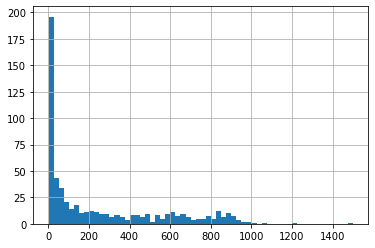

In [61]:
level_list = ["A2-level", "A3-level", "A4-level", "B1-level", "B2-level", "B3-level", "B4-level"]
all_df[all_df["mode"] == "nawabari"][level_list].apply(pd.value_counts).sum(axis=1).hist(bins=60)

In [66]:
rank_list = ["A2-rank", "A3-rank", "A4-rank", "B1-rank", "B2-rank", "B3-rank", "B4-rank"]
all_df[all_df["mode"] == "asari"][rank_list].apply(pd.value_counts).sum(axis=1)

a      4509
a+     5501
a-     4366
b      1091
b+     1603
b-     1308
c        33
c+       51
c-      175
s     10653
s+    31345
x     41730
dtype: int64